O gráfico de áreas empilhadas 100% é um tipo de gráfico de áreas em que os dados são apresentados como porcentagens do total, permitindo comparar a distribuição relativa de várias categorias ao longo de um eixo. Neste tipo de gráfico, a área total da representação é sempre igual a 100%, o que facilita a visualização das proporções entre as categorias.

Este tipo de gráfico é útil quando desejamos comparar a contribuição de diferentes categorias para o total em várias séries de dados. Ele é bastante útil quando temos várias séries com tamanhos variados e queremos entender a distribuição percentual de cada categoria em relação ao total. Além disso, os gráficos de áreas empilhadas 100% são adequados para mostrar como a composição das categorias muda ao longo do tempo.

Vamos entender as diferenças entre o gráfico de áreas empilhadas com valores absolutos e o de áreas empilhadas 100% por meio de um exemplo explorando um case do e-commerce Buscante, um buscador online de livros.

Neste caso, você precisa representar a composição dos acessos dos usuários nos últimos 5 anos (2018 a 2022) na plataforma, tomando como base o acesso realizado nos três países em que a empresa possui clientes. A base de dados que você recebeu possui as quantidades de acesso dos três países (Brasil, Argentina e Colômbia) em cada ano de pesquisa.

Para resolver este problema, vamos criar 2 diferentes gráficos: o gráfico de áreas empilhadas para mostrar a magnitude e variação dos acessos ano a ano e um gráfico de áreas empilhadas 100% para mostrar a distribuição relativa dos acessos entre os países.

Primeiro, vamos importar as bibliotecas que vamos utilizar e criar o DataFrame com os dados fornecidos para a construção do 1º gráfico:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acessos em milhões de cada país em cada ano
acessos = pd.DataFrame({'Ano': [2018, 2019, 2020, 2021, 2022], 'Brasil': [120, 150, 180, 200, 220],
                        'Argentina': [85, 110, 130, 150, 170],  'Colômbia': [50, 70, 90, 110, 130]})

acessos = acessos.set_index("Ano")
acessos

,Brasil,Argentina,Colômbia
Ano,,,
2018,120,85,50
2019,150,110,70
2020,180,130,90
2021,200,150,110
2022,220,170,130


In [ ]:
# Normalizando os números de acessos e deixando-os numa escala de 0 a 100
acessos_normalizados = (acessos.div(acessos.sum(axis=1), axis=0) * 100).round(1)
acessos_normalizados

,Brasil,Argentina,Colômbia
Ano,,,
2018,47.1,33.3,19.6
2019,45.5,33.3,21.2
2020,45.0,32.5,22.5
2021,43.5,32.6,23.9
2022,42.3,32.7,25.0


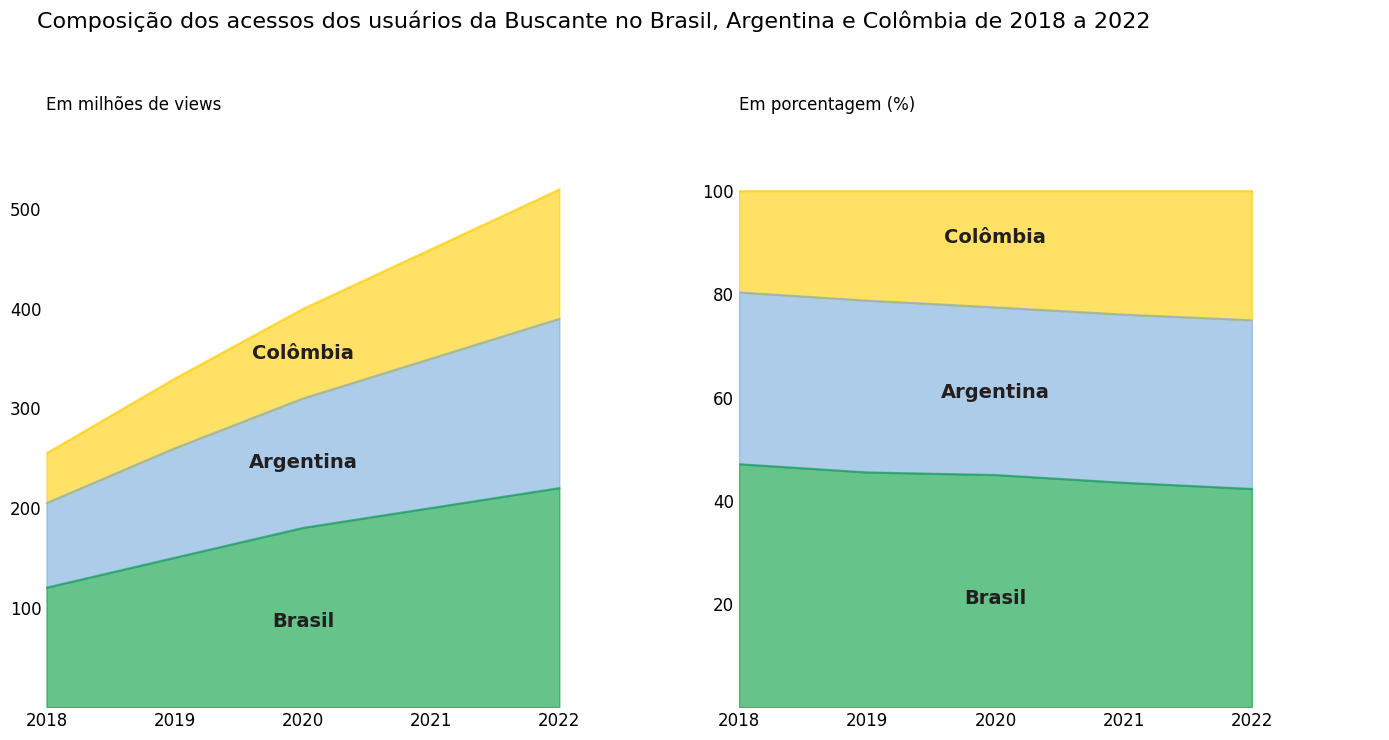

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

fig.suptitle('Composição dos acessos dos usuários da Buscante no Brasil, Argentina e Colômbia de 2018 a 2022',
             fontsize = 16, ha = 'left', x = 0.03, y = 1.05)

# GRÁFICO 1 - gráfico de áreas empilhadas

acessos.plot.area(color = ["#009C3B", "#75AADB", "#FFCD00"], xticks=np.arange(2018, 2023,1), ax = axs[0], alpha= 0.6)
axs[0].set_title('Em milhões de views\n', loc = "left")
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_ylim(0.01, 570)     # ajustando os limites do eixo y
axs[0].set_xbound(2018,2023)   # ajustando os limites do eixo x
axs[0].legend().remove()
axs[0].tick_params(axis='both', which='both', length=0)
axs[0].set_frame_on(False)

## Anotando os nomes das regiões
pais = acessos.columns
y_pos = [80, 240, 350]
for i in range(len(pais)):
  axs[0].text(2020, y_pos[i], f'{pais[i]}', color = '#231F20', weight = "bold", fontsize = 14, ha="center", transform=axs[0].transData)

#######################################

# GRÁFICO 2 - gráfico de áreas empilhadas 100%

acessos_normalizados.plot.area(color = ["#009C3B", "#75AADB", "#FFCD00"], xticks=np.arange(2018, 2023,1), ax = axs[1], alpha= 0.6)
axs[1].set_title('Em porcentagem (%)\n', loc = "left")
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylim(0.01, 110)     # ajustando os limites do eixo y
axs[1].set_xbound(2018,2023)   # ajustando os limites do eixo x
axs[1].legend().remove()
axs[1].tick_params(axis='both', which='both', length=0)
axs[1].set_frame_on(False)

## Anotando os nomes das regiões
pais = acessos_normalizados.columns
y_pos = [20, 60, 90]
for i in range(len(pais)):
  axs[1].text(2020, y_pos[i], f'{pais[i]}', color = '#231F20', weight = "bold", fontsize = 14, ha="center", transform=axs[1].transData)

plt.tight_layout()
plt.show()

Note, neste exemplo da Buscante, que possuímos diferentes interpretações para os dois gráficos. Em essência os dados são os mesmos, mas as escalas escolhidas possuem intencionalidades diferentes para apresentação do dado.

O gráfico de barras empilhadas foca na magnitude dos dados apontando, por exemplo, o crescimento global dos acessos e também as diferenças absolutas entre cada país. Já o gráfico de áreas empilhadas 100% representa a contribuição de cada país para o total de acessos. Ou seja, não conseguimos averiguar a evolução ou não dos acessos totais ano a ano, mas é mais evidente a composição de cada país para os acessos em cada um dos anos.